In [17]:
import numpy as np
import sympy as sp
import control as ct
from control2020 import core
from matplotlib import pyplot as plt

In [2]:
core.pole_to_psi_wn(2 + 3j)

(-0.5547001962252291, 3.605551275463989)

In [9]:
s = sp.var("s")
g = 1/(s+3)/(s+4)/s/(s**2+3*s+0.5)
sys = core.symbolic_transfer_function(g)
sys


                       0.3333
----------------------------------------------------
0.3333 s^5 + 3.333 s^4 + 11.17 s^3 + 13.17 s^2 + 2 s

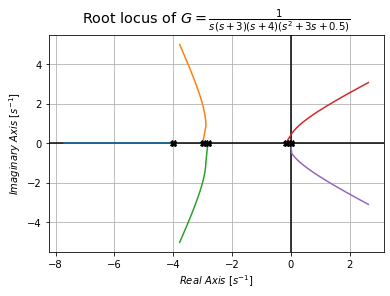

In [10]:
core.plot_root_locus(g)

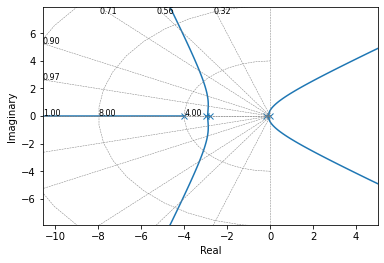

In [11]:
_ = ct.rlocus(sys)

Compensator Points
-1.50 + 2.59i
-1.50 + -2.59i


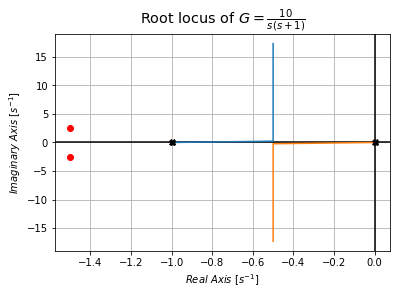

In [27]:
# Designin a compensator (try 1)
g = 10/s/(s+1)
system = core.symbolic_transfer_function(g)

po = 16.3
ts = 2.67

psi, wn = core.from_quality_to_psi_wn(po, ts)
compensator_points = core.construct_poles(psi, wn)
print("Compensator Points")
for point in compensator_points:
    print("%.2f + %.2fi"%(point.real, point.imag))
core.plot_root_locus(g, ki=0, kf=30, points=int(1e3))
plt.plot(np.real(compensator_points), np.imag(compensator_points), "ro")

In [28]:
compensator_points

((-1.4981273408239701+2.5945384082434084j),
 (-1.4981273408239701-2.5945384082434084j))

In [37]:
upper_point = compensator_points[0]

In [47]:
zeros_angles = []
for i, zero in enumerate(ct.zero(system)):
    a = np.angle(upper_point - zero)*180/np.pi
    zeros_angles.append(a)
    print(f"zero {i} = {a} deg")
    
poles_angles = []
for i, pole in enumerate(ct.pole(system)):
    a = np.angle(upper_point - pole)*180/np.pi
    poles_angles.append(a)
    print(f"pole {i} = {a} deg")

pole 0 = 100.86801347030551 deg
pole 1 = 120.00281374951798 deg


In [48]:
angle_plant = sum(zeros_angles) - sum(poles_angles)

In [50]:
compensator_angle = -180 - angle_plant

In [51]:
compensator_angle

40.8708272198235